In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import GPy

https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/index.ipynb
https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_gp.ipynb

In [2]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.1

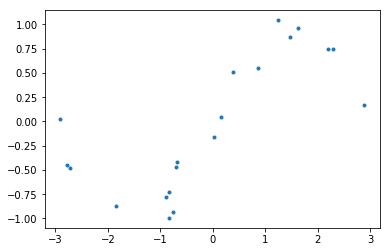

In [3]:
_ = plt.plot(X, Y, marker='.', linestyle='none')

In [4]:
kernel = GPy.kern.RBF(input_dim=1)

In [5]:
model = GPy.models.GPRegression(X, Y, kernel)

 /home/mattmcd/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


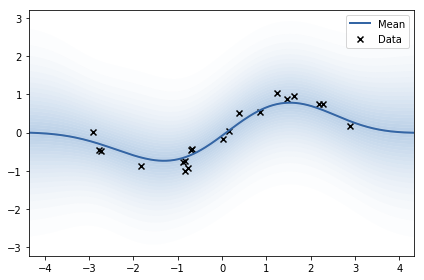

In [6]:
model.plot(plot_density=True)

In [7]:
model.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s03  0005   2.134324e+00   2.009626e-01 
    00s06  0010   2.119469e+00   4.861109e-05 
    00s12  0015   2.119428e+00   3.429012e-10 
    00s13  0017   2.119428e+00   3.018148e-13 
Runtime:     00s13
Optimization status: Converged



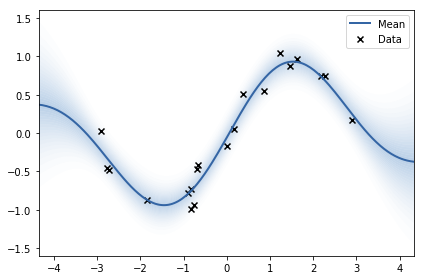

In [8]:
model.plot(plot_density=True)

In [9]:
model

GP_regression.,value,constraints,priors
rbf.variance,0.593731925545,+ve,
rbf.lengthscale,1.54500031436,+ve,
Gaussian_noise.variance,0.0280885408809,+ve,


In [10]:
help(model.predict)

Help on method predict in module GPy.core.gp:

predict(self, Xnew, full_cov=False, Y_metadata=None, kern=None, likelihood=None, include_likelihood=True) method of GPy.models.gp_regression.GPRegression instance
    Predict the function(s) at the new point(s) Xnew. This includes the likelihood
    variance added to the predicted underlying function (usually referred to as f).
    
    In order to predict without adding in the likelihood give
    `include_likelihood=False`, or refer to self.predict_noiseless().
    
    :param Xnew: The points at which to make a prediction
    :type Xnew: np.ndarray (Nnew x self.input_dim)
    :param full_cov: whether to return the full covariance matrix, or just
                     the diagonal
    :type full_cov: bool
    :param Y_metadata: metadata about the predicting point to pass to the likelihood
    :param kern: The kernel to use for prediction (defaults to the model
                 kern). this is useful for examining e.g. subprocesses.
    :par

In [11]:
model.predict(np.array([4.0]).reshape(-1,1))

(array([[-0.32605298]]), array([[ 0.21352971]]))

In [12]:
help(GPy.core.gp.GP.predict_quantiles)

Help on method predict_quantiles in module GPy.core.gp:

predict_quantiles(self, X, quantiles=(2.5, 97.5), Y_metadata=None, kern=None, likelihood=None) unbound GPy.core.gp.GP method
    Get the predictive quantiles around the prediction at X
    
    :param X: The points at which to make a prediction
    :type X: np.ndarray (Xnew x self.input_dim)
    :param quantiles: tuple of quantiles, default is (2.5, 97.5) which is the 95% interval
    :type quantiles: tuple
    :param kern: optional kernel to use for prediction
    :type predict_kw: dict
    :returns: list of quantiles for each X and predictive quantiles for interval combination
    :rtype: [np.ndarray (Xnew x self.output_dim), np.ndarray (Xnew x self.output_dim)]



In [13]:
model.predict_quantiles(np.array([4.0]).reshape(-1,1), quantiles=(2.5, 97.5))

[array([[-1.23173813]]), array([[ 0.57963216]])]